In [2]:
#Imports
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1

In [3]:
#Deze functie wordt gebruikt om inline the image te kunnen tonen
def plot_with_matlib(image):
    rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(rgb_image)

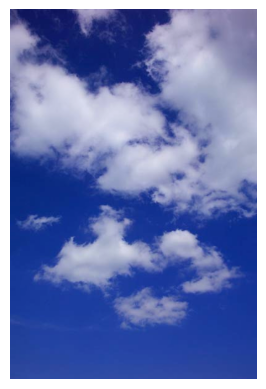

In [4]:
# Loading cloud image
clouds = cv.imread("./Images/clouds.png")
plot_with_matlib(clouds)
#cv.imshow("Clouds image",clouds)
#cv.waitKey(0)


## Question 1:
### What do the dimensions of the image array represent?

The array shape of the image is (width,height,BGR): in the clouds image this is (600,400,BGR(depends on pixel)).
BGR is the same as RGB but in reverse.

## Assignment 1: Crop the image so it becomes square by chopping off the bottom part. 

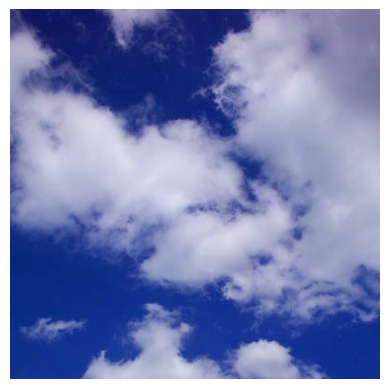

In [5]:
clouds_cropped = clouds[:clouds.shape[1]] 
plot_with_matlib(clouds_cropped)
#cv.imshow("clouds_cropped",clouds_cropped)
#cv.waitKey(0)

## Assignment 2: Discolor the image by reducing the intensity of the red value of every pixel by half.

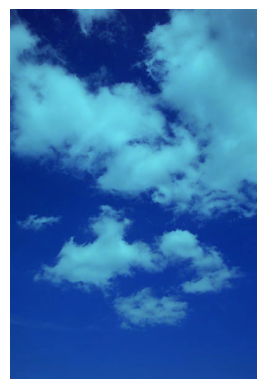

In [6]:
clouds_distorted = clouds.copy()
#Doordat opencv met BGR werkt is de red channel dus het derde channel
clouds_distorted[:, :, 2] = clouds_distorted[:, :, 2] * 0.5
plot_with_matlib(clouds_distorted)
#cv.imshow("clouds_red_halved",clouds_distorted)
#cv.waitKey(0)

## Assignment 3: Discolor the image by doubling the intensity of the red value of every pixel. You may have to handle an overflow problem (and use two more lines of code).

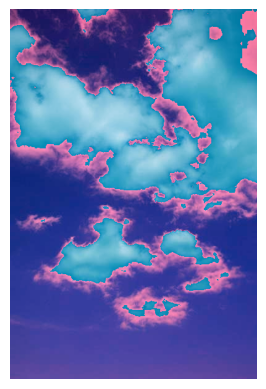

In [8]:
clouds_doubled = clouds.copy()
#Doordat opencv met BGR werkt is de red channel dus het derde channel
clouds_doubled[:, :, 2] = clouds_doubled[:, :, 2] * 2
clouds_doubled[:, :, 2] = np.clip(clouds_doubled[:, :, 2], 0, 255)
plot_with_matlib(clouds_doubled)
#cv.imshow("red_doubled",clouds_doubled)
#cv.waitKey(0)

## Assignment 4: Make a regular grid of black dots on the image so that the dots are 10 pixels apart vertically and horizontally, like in the image below.

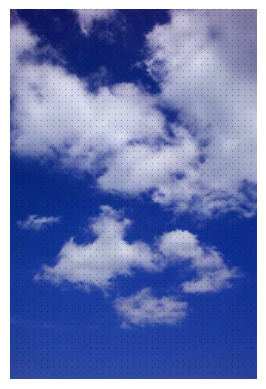

In [16]:
clouds_dotted = clouds.copy()

clouds_dotted[::10,::10] = [0,0,0]
plot_with_matlib(clouds_dotted)
#cv.imshow("clouds_dotted", clouds_dotted)
#cv.waitKey(0)

# Exercise 2

## Assignment 5: Convert the image to a grayscale image.

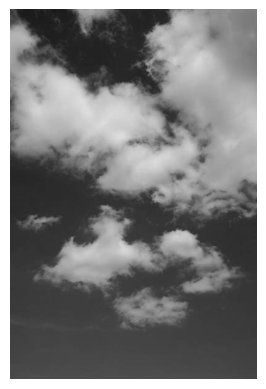

In [17]:
clouds_gray = clouds.copy()
clouds_gray = cv.cvtColor(clouds_gray,cv.COLOR_BGR2GRAY) 
#IMPORTANT: grayscale is van 3 color channels -> 1, door de functie plot_with_matlib zet ik dit terug naar 3 channels, resultaat hieronder
plot_with_matlib(clouds_gray)

## Assignment 6: Threshold the grayscale image at 50% of the maximum value for this datatype.

Obtained threshold:  111.5


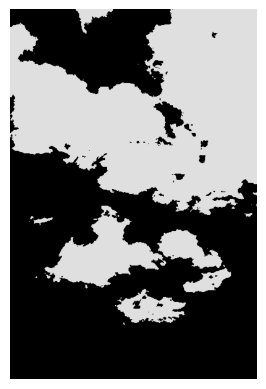

In [21]:
threshhold = clouds_gray.max() *0.5
_, thresholded_clouds = cv.threshold(clouds_gray, threshhold, clouds_gray.max(), cv.THRESH_BINARY)
print("Obtained threshold: ", threshhold)
plot_with_matlib(thresholded_clouds)
#cv.imshow("clouds thresholded",thresholded_clouds)
#cv.waitKey(0)

## Assignment 7: Threshold the grayscale image at the ideal threshold determined by Otsu’s method.

Obtained threshold:  114.0


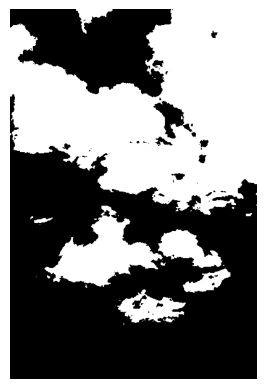

In [20]:
# Applying Otsu's method setting the flag value into cv.THRESH_OTSU.
otsu_threshold, image_result = cv.threshold(clouds_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU,)
print("Obtained threshold: ", otsu_threshold)
plot_with_matlib(image_result)

# Exercise 3

## Assignment 8: Adaptively threshold the grayscale version of painting2.jpg so you get a similar result to the one below, where the background is uniformly white and you can cut out the painting along black lines.

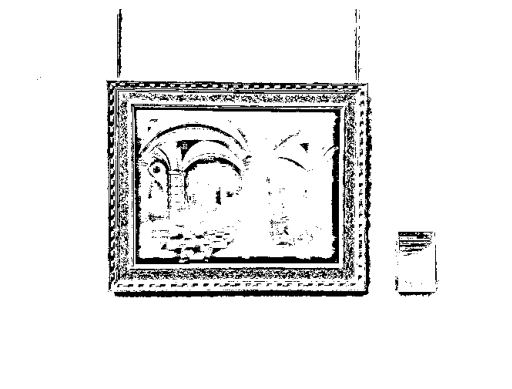

In [40]:
painting = cv.imread("./Images/painting2.jpg")
painting_gray = cv.cvtColor(painting,cv.COLOR_BGR2GRAY)
#Ok, de laatste 2 values (21,15) representeren blocksize and C value, beide zijn "hyperparameters". 
painting_thresholded = cv.adaptiveThreshold(painting_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,21,15)
plot_with_matlib(painting_thresholded)

# Exercise 4

## Assignment 9: Remove the white noise from whitenoise.png by Gaussian filtering. Find parameters for the Gaussian kernel that you find strike a good balance between noise level and blurriness of the result. This is subjective, but experiment with it!

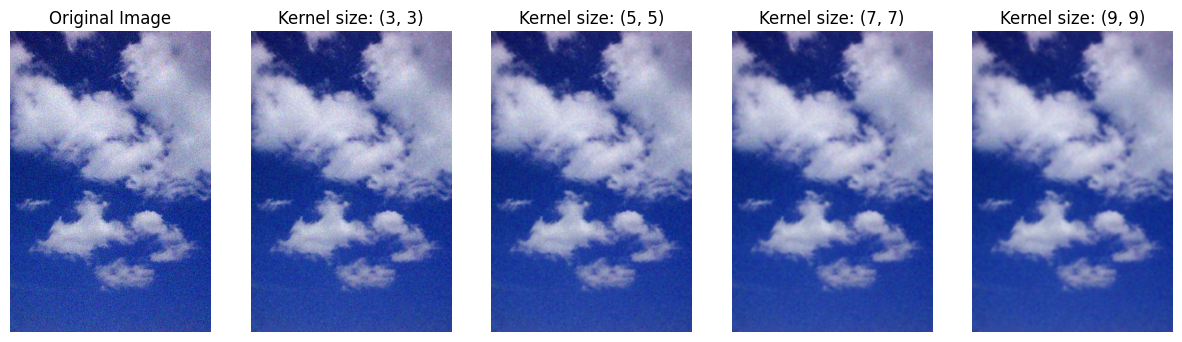

In [63]:
white_noise = cv.imread("./Images/whitenoise.png")
def apply_guassian(image):
    blurred_images = []
    kernel_sizes = [(3, 3), (5, 5), (7, 7),(9,9)]  # Experiment with different kernel sizes

    fig, axes = plt.subplots(1, len(kernel_sizes) + 1, figsize=(15, 5))
    axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    for i, kernel_size in enumerate(kernel_sizes):
        blurred_image = cv.GaussianBlur(image, kernel_size, 0)
        blurred_images.append(blurred_image)
        axes[i+1].imshow(cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB))
        axes[i+1].set_title(f'Kernel size: {kernel_size}')
        axes[i+1].axis('off')


    plt.show()


apply_guassian(white_noise)

## Question 2:
### Can you choose the kernel size and sigma of the distribution independent of each other?

In theory they can be changed independently, however after some research I see some article saying it's better to make sure they are chosen depentdent from each other. However in opencv this can be achieved easily, if you put the paramater sigmaX (and/or sigmaY) to 0, the deviation will be calculated based on the kernel size. If you take a different value > 0 it use those instead.


# Exercise 5

## Assignment: 10 Test the Gaussian filter on saltandpeppernoise.png

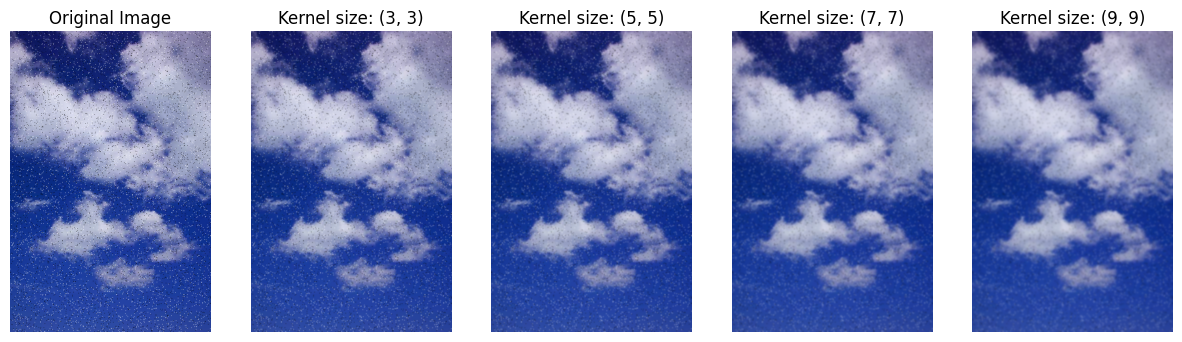

In [64]:
salt_pepper = cv.imread("./Images/saltandpeppernoise.png")
apply_guassian(salt_pepper)

## Assignment 11: Apply median filtering on the same image.

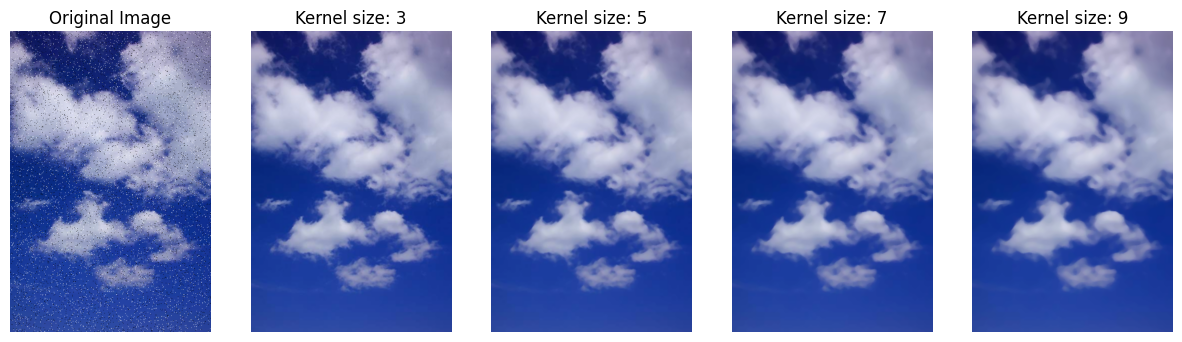

In [68]:
def apply_median(image):
    copy = image.copy()
    blurred_images = []
    kernel_sizes = [3, 5, 7, 9]  # Experiment with different kernel sizes

    fig, axes = plt.subplots(1, len(kernel_sizes) + 1, figsize=(15, 5))
    axes[0].imshow(cv.cvtColor(copy, cv.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    for i, kernel_size in enumerate(kernel_sizes):
        blurred_image = cv.medianBlur(copy, kernel_size)
        blurred_images.append(blurred_image)
        axes[i+1].imshow(cv.cvtColor(blurred_image, cv.COLOR_BGR2RGB))
        axes[i+1].set_title(f'Kernel size: {kernel_size}')
        axes[i+1].axis('off')

    plt.show()

apply_median(salt_pepper)

## Question 3:
### Which result is preferable and why?

The median filter is in this case definetly more preferred. This is cause the median filter changes the central element to the median value under the kernel area. This has the effect of removing extreme outliers easily. While in the guassian filter we calculate the new value based on the kernel area, this may result in the pixel not changing at all and outliers having a great effect.

Conclusion: in this case median filter is better

# Exercise 6

## Assignment 12 Implement unsharp masking to sharpen unsharp.png. Make sure you do not get overflow in your datatype! Your goal is to achieve something similar to the image below. Useful functions: addWeighted

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-13.0


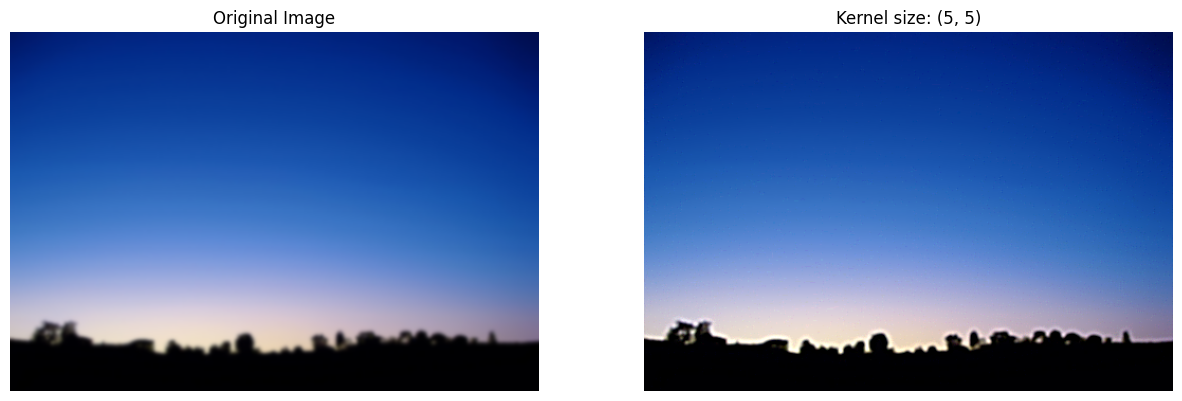

In [106]:
unsharp = cv.imread("./Images/unsharp.png")

def apply_unsharp_masking(image):
    copy = image.copy()
    
    
    sharp_images = []
    kernels = [(5, 5)]  # Experiment with different kernel sizes

    fig, axes = plt.subplots(1, len(kernels) + 1, figsize=(15, 5))
    axes[0].imshow(cv.cvtColor(copy, cv.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    for i, kernel_size in enumerate(kernels):
        #step 1: blur
        blurred_image = cv.GaussianBlur(copy, kernel_size,0)
        #step 2: diff
        diff_image = cv.addWeighted(copy,1,blurred_image,-1,0.0, dtype=cv.CV_32F)
        
        print(diff_image.min())
        #step 3: amplify the difference
        multiplier = 10
        
        #step4: add to og
        sharp = cv.addWeighted(copy, 1, diff_image, multiplier, 0.0,dtype=cv.CV_32F)
        
        sharp = sharp/255
        sharp_images.append(sharp)
        #sharp = sharp.astype("uint8")
        axes[i+1].imshow(cv.cvtColor(sharp, cv.COLOR_BGR2RGB))
        axes[i+1].set_title(f'Kernel size: {kernel_size}')
        axes[i+1].axis('off')

    plt.show()

    
   
apply_unsharp_masking(unsharp) 
    

# Exercise 7

## Assignment 13: Write a program that blurs blots.png diagonally with the kernel below (mind the multiplication factor in front).

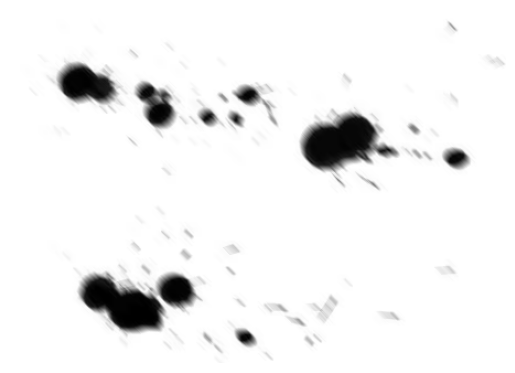

In [117]:
blots = cv.imread("./Images/blots.png")

def apply_kernel(kernel,image):
    copy = image.copy()
    filtered_image = cv.filter2D(copy, -1, kernel)
    plot_with_matlib(filtered_image)
    
# Create a 15x15 matrix
matrix = np.zeros((15, 15))

# Set diagonal elements to 1 for the first 8 rows
for i in range(7):
    matrix[i, i] = 1
    
kernel = matrix * (1/7)
apply_kernel(kernel,blots)

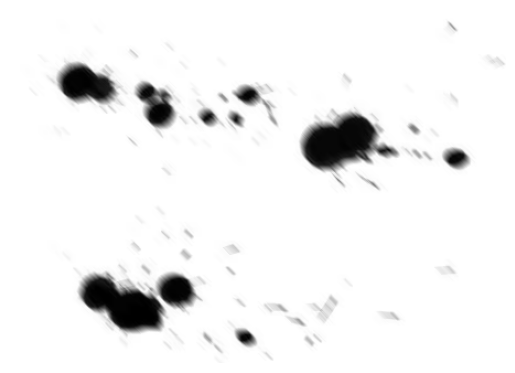

In [122]:
# Create a 15x15 matrix
matrix = np.zeros((8, 8))

# Set diagonal elements to 1 for the first 8 rows
for i in range(7):
    matrix[i, i] = 1

anchor_point = (7, 7)  # This will be (4, 4) for an 8x8 kernel
kernel = matrix * (1/7)
filtered_image_8x8 = cv.filter2D(blots, -1, kernel,anchor=anchor_point)
plot_with_matlib(filtered_image_8x8)


## Question 4:
### You can achieve the same result with a 8x8 kernel, by moving the anchor point. What coordinates will you specify for the anchor point?

In order to create the same effect using the 8x8 kernel we have to move the anchor point so it represents the centerpoint of the 15x15 kernel. This means the bottomright corner needs to be the anchorpoint index (7,7).